In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.134
!pip install -U ultralytics

from IPython import display
display.clear_output()
!yolo mode=checks

WARNING ⚠️ 'yolo mode=checks' is deprecated. Use 'yolo checks' instead.
Ultralytics YOLOv8.0.162 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
!pip install roboflow --quiet
!pip install Pillow

from roboflow import Roboflow
rf = Roboflow(api_key="eSY6Bks0HNmuOCGSdmrn")
project = rf.workspace("intelligent-bar-counting-cqz8y").project("steel-rods-annotation")
dataset = project.version(33).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.162, to fix: `pip install ultralytics==8.0.134`

Extracting Dataset Version Zip to Steel-Rods-Annotation-33 in yolov8:: 100%|██████████| 4942/4942 [00:01<00:00, 3312.70it/s]


In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=5 imgsz=500

/content
Ultralytics YOLOv8.0.162 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/Steel-Rods-Annotation-33/data.yaml, epochs=5, patience=50, batch=16, imgsz=500, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, o

In [ ]:
# checking for trained results in train

!ls {HOME}/runs/detect/train2/

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1692971429.832c7228a7ff.3454.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


/content


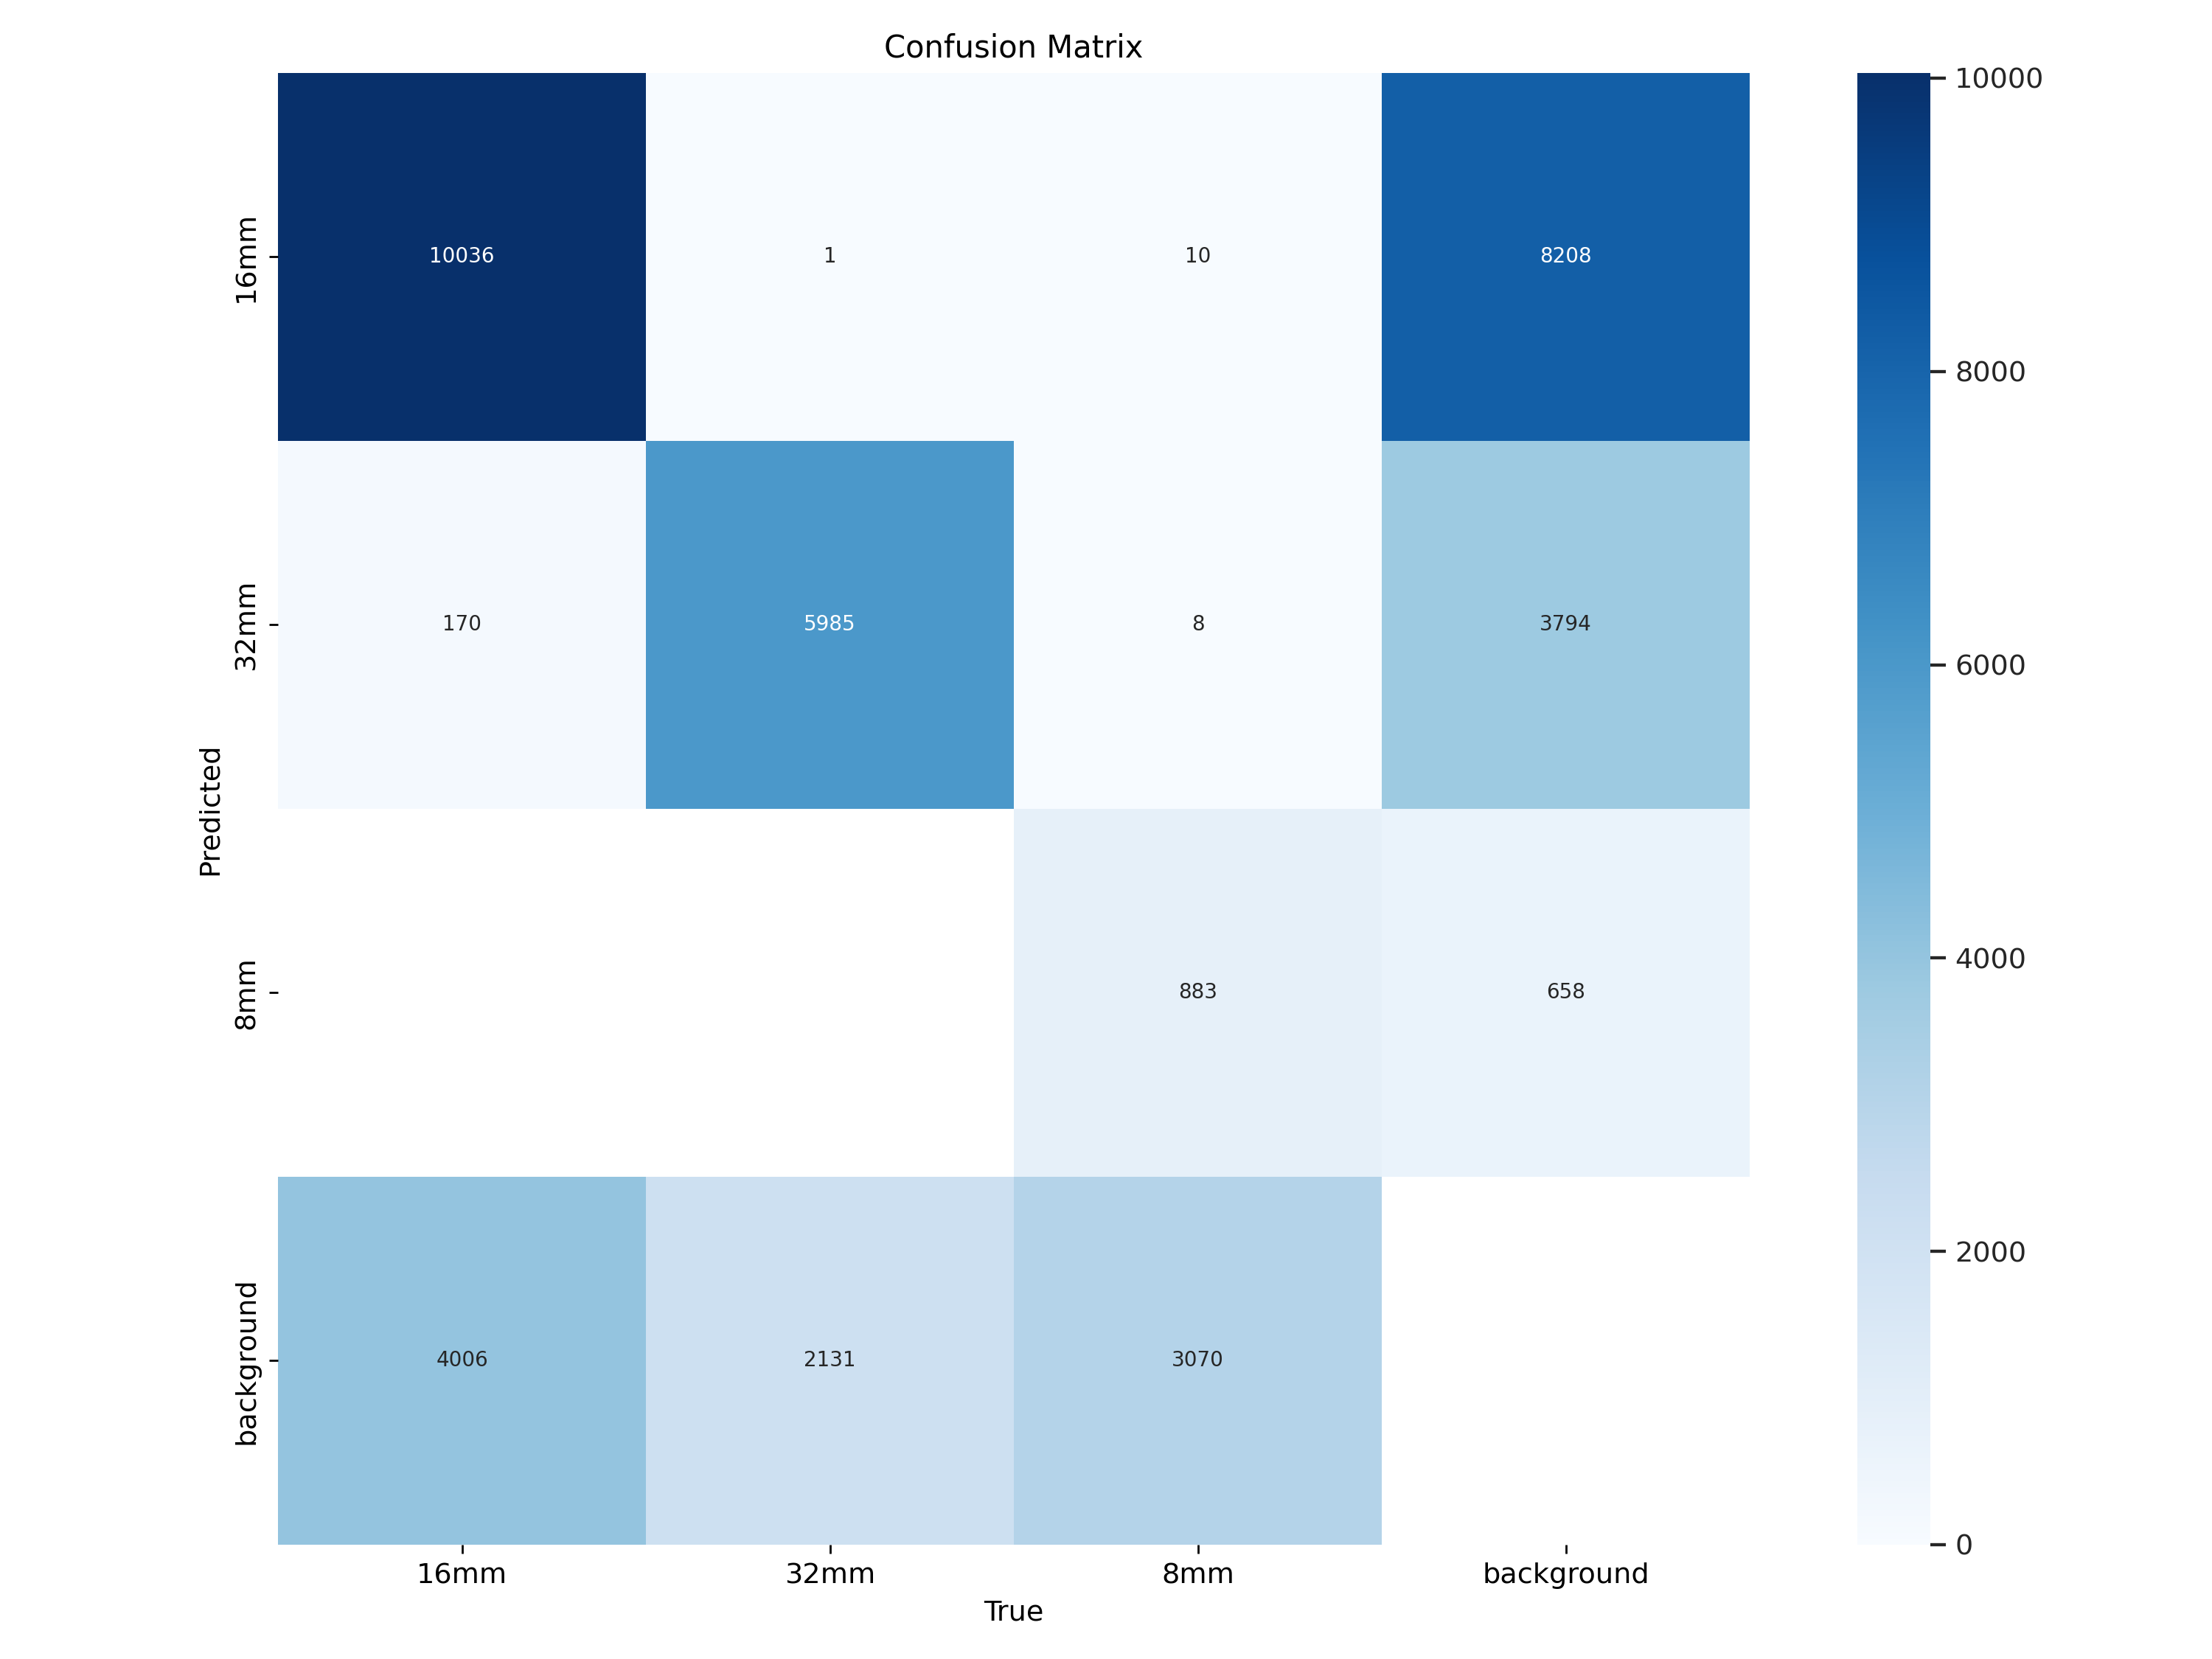

In [ ]:
# plotting confusion matrix

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=800)

/content


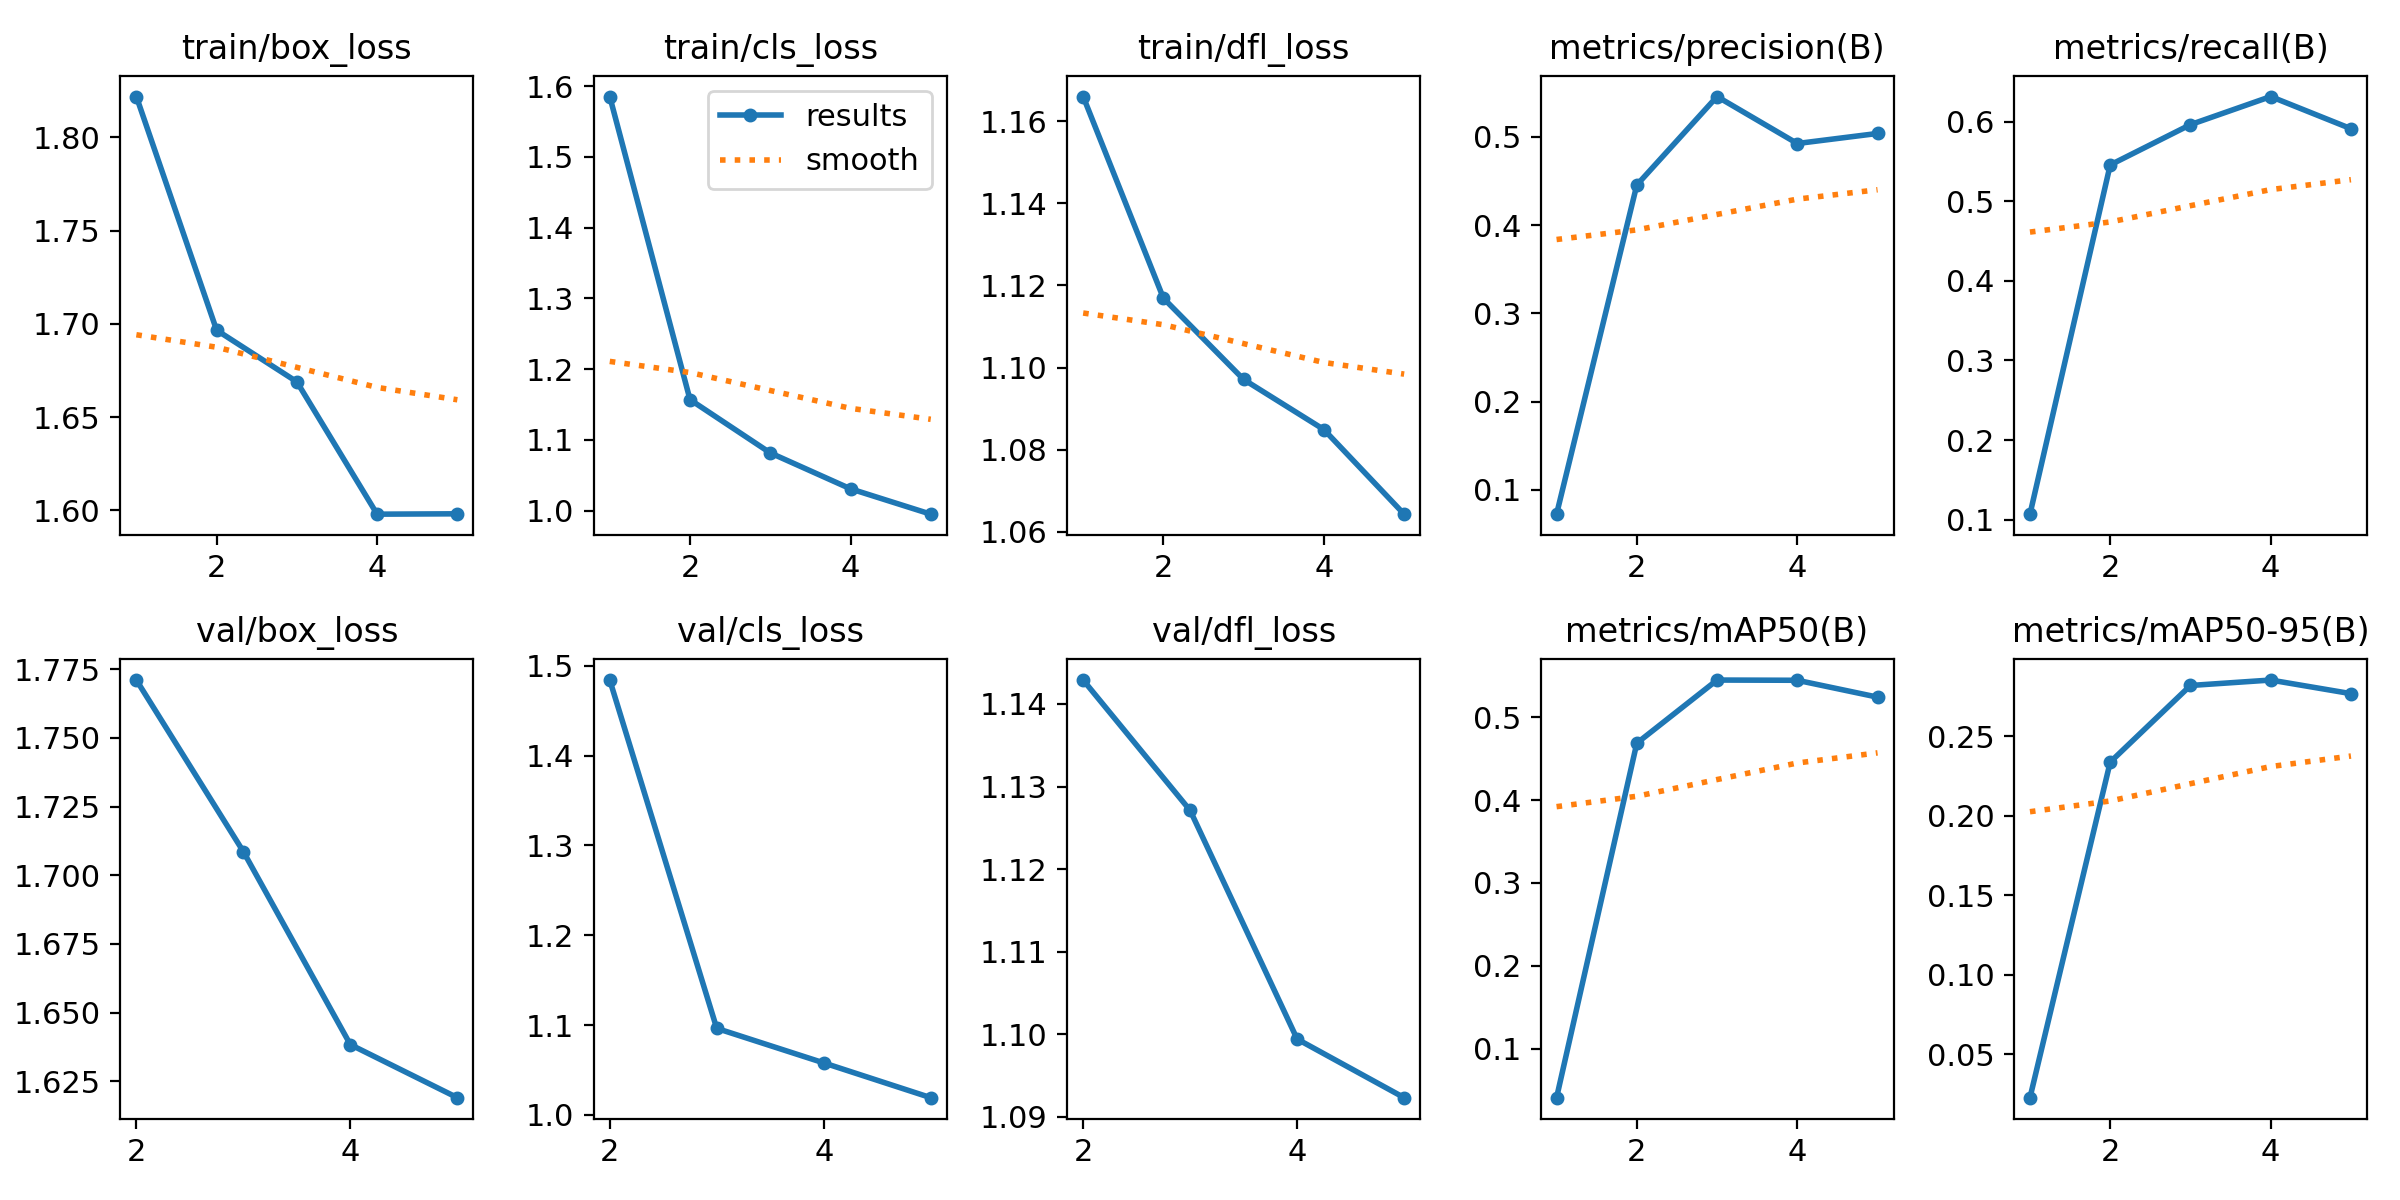

In [ ]:
# Obtaining the train2 results
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=800)

/content


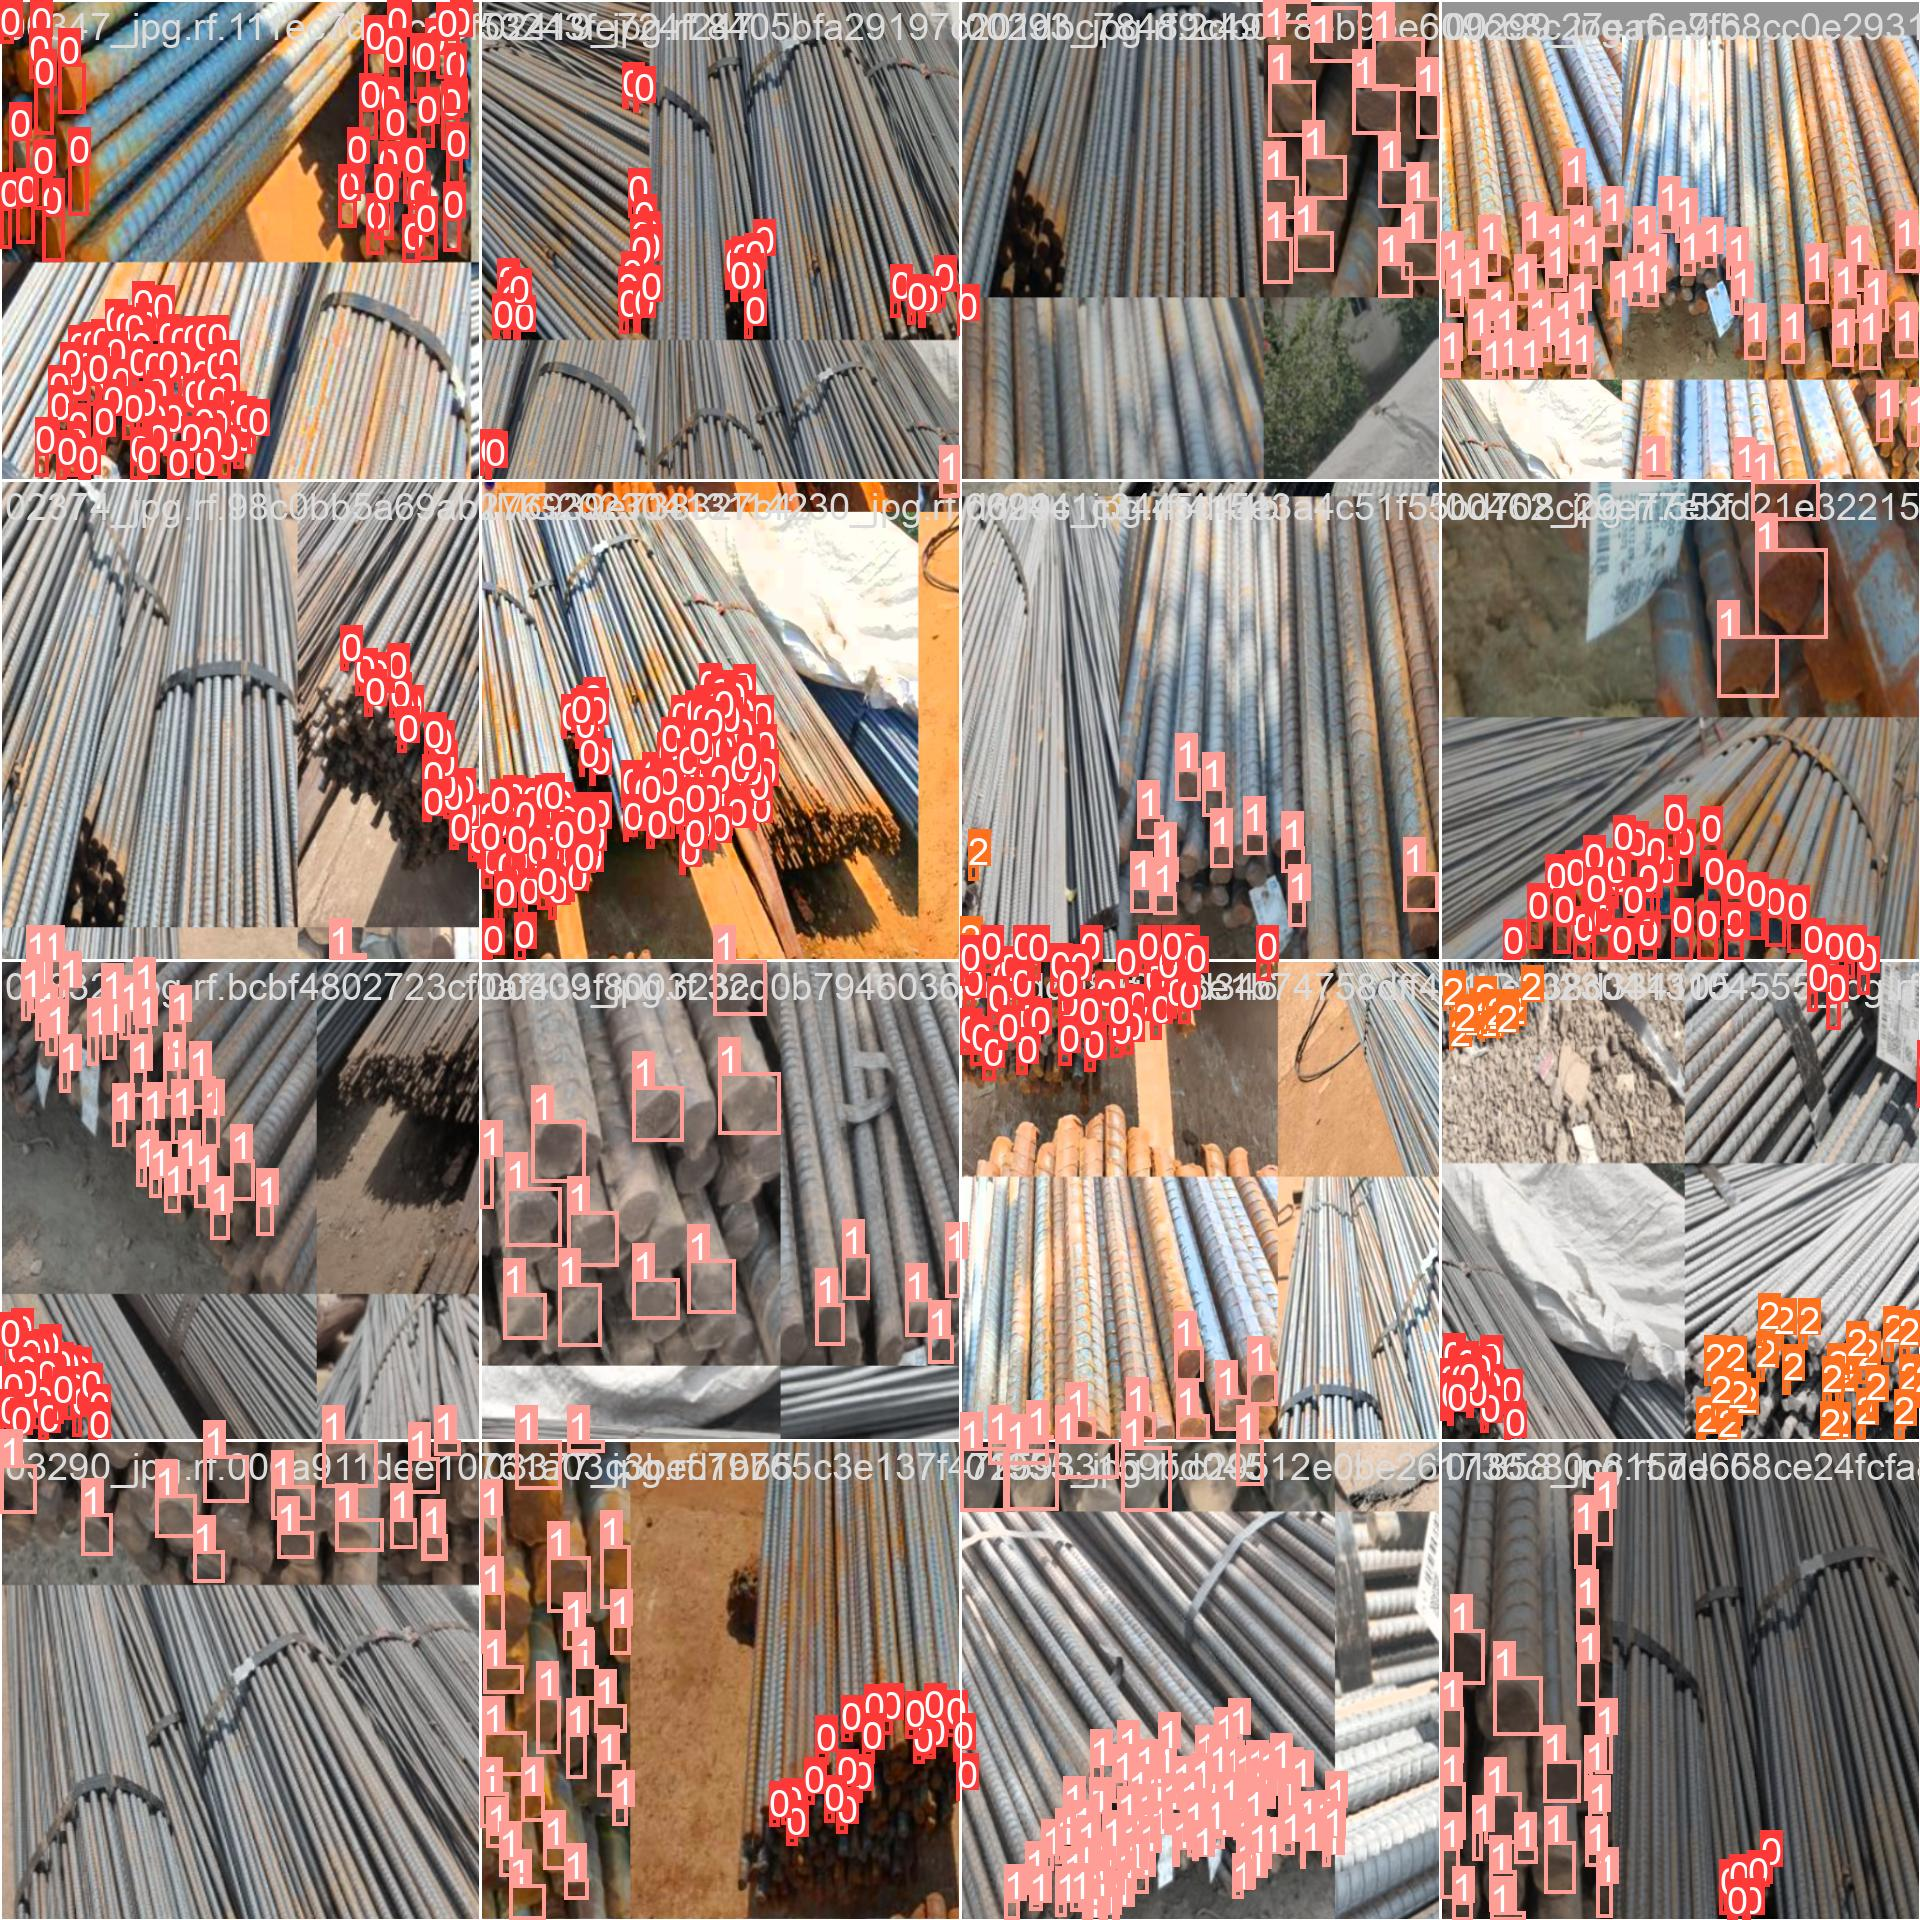

In [ ]:
# checking the train_batch2.jpg
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/train_batch2.jpg', width=800)

/content


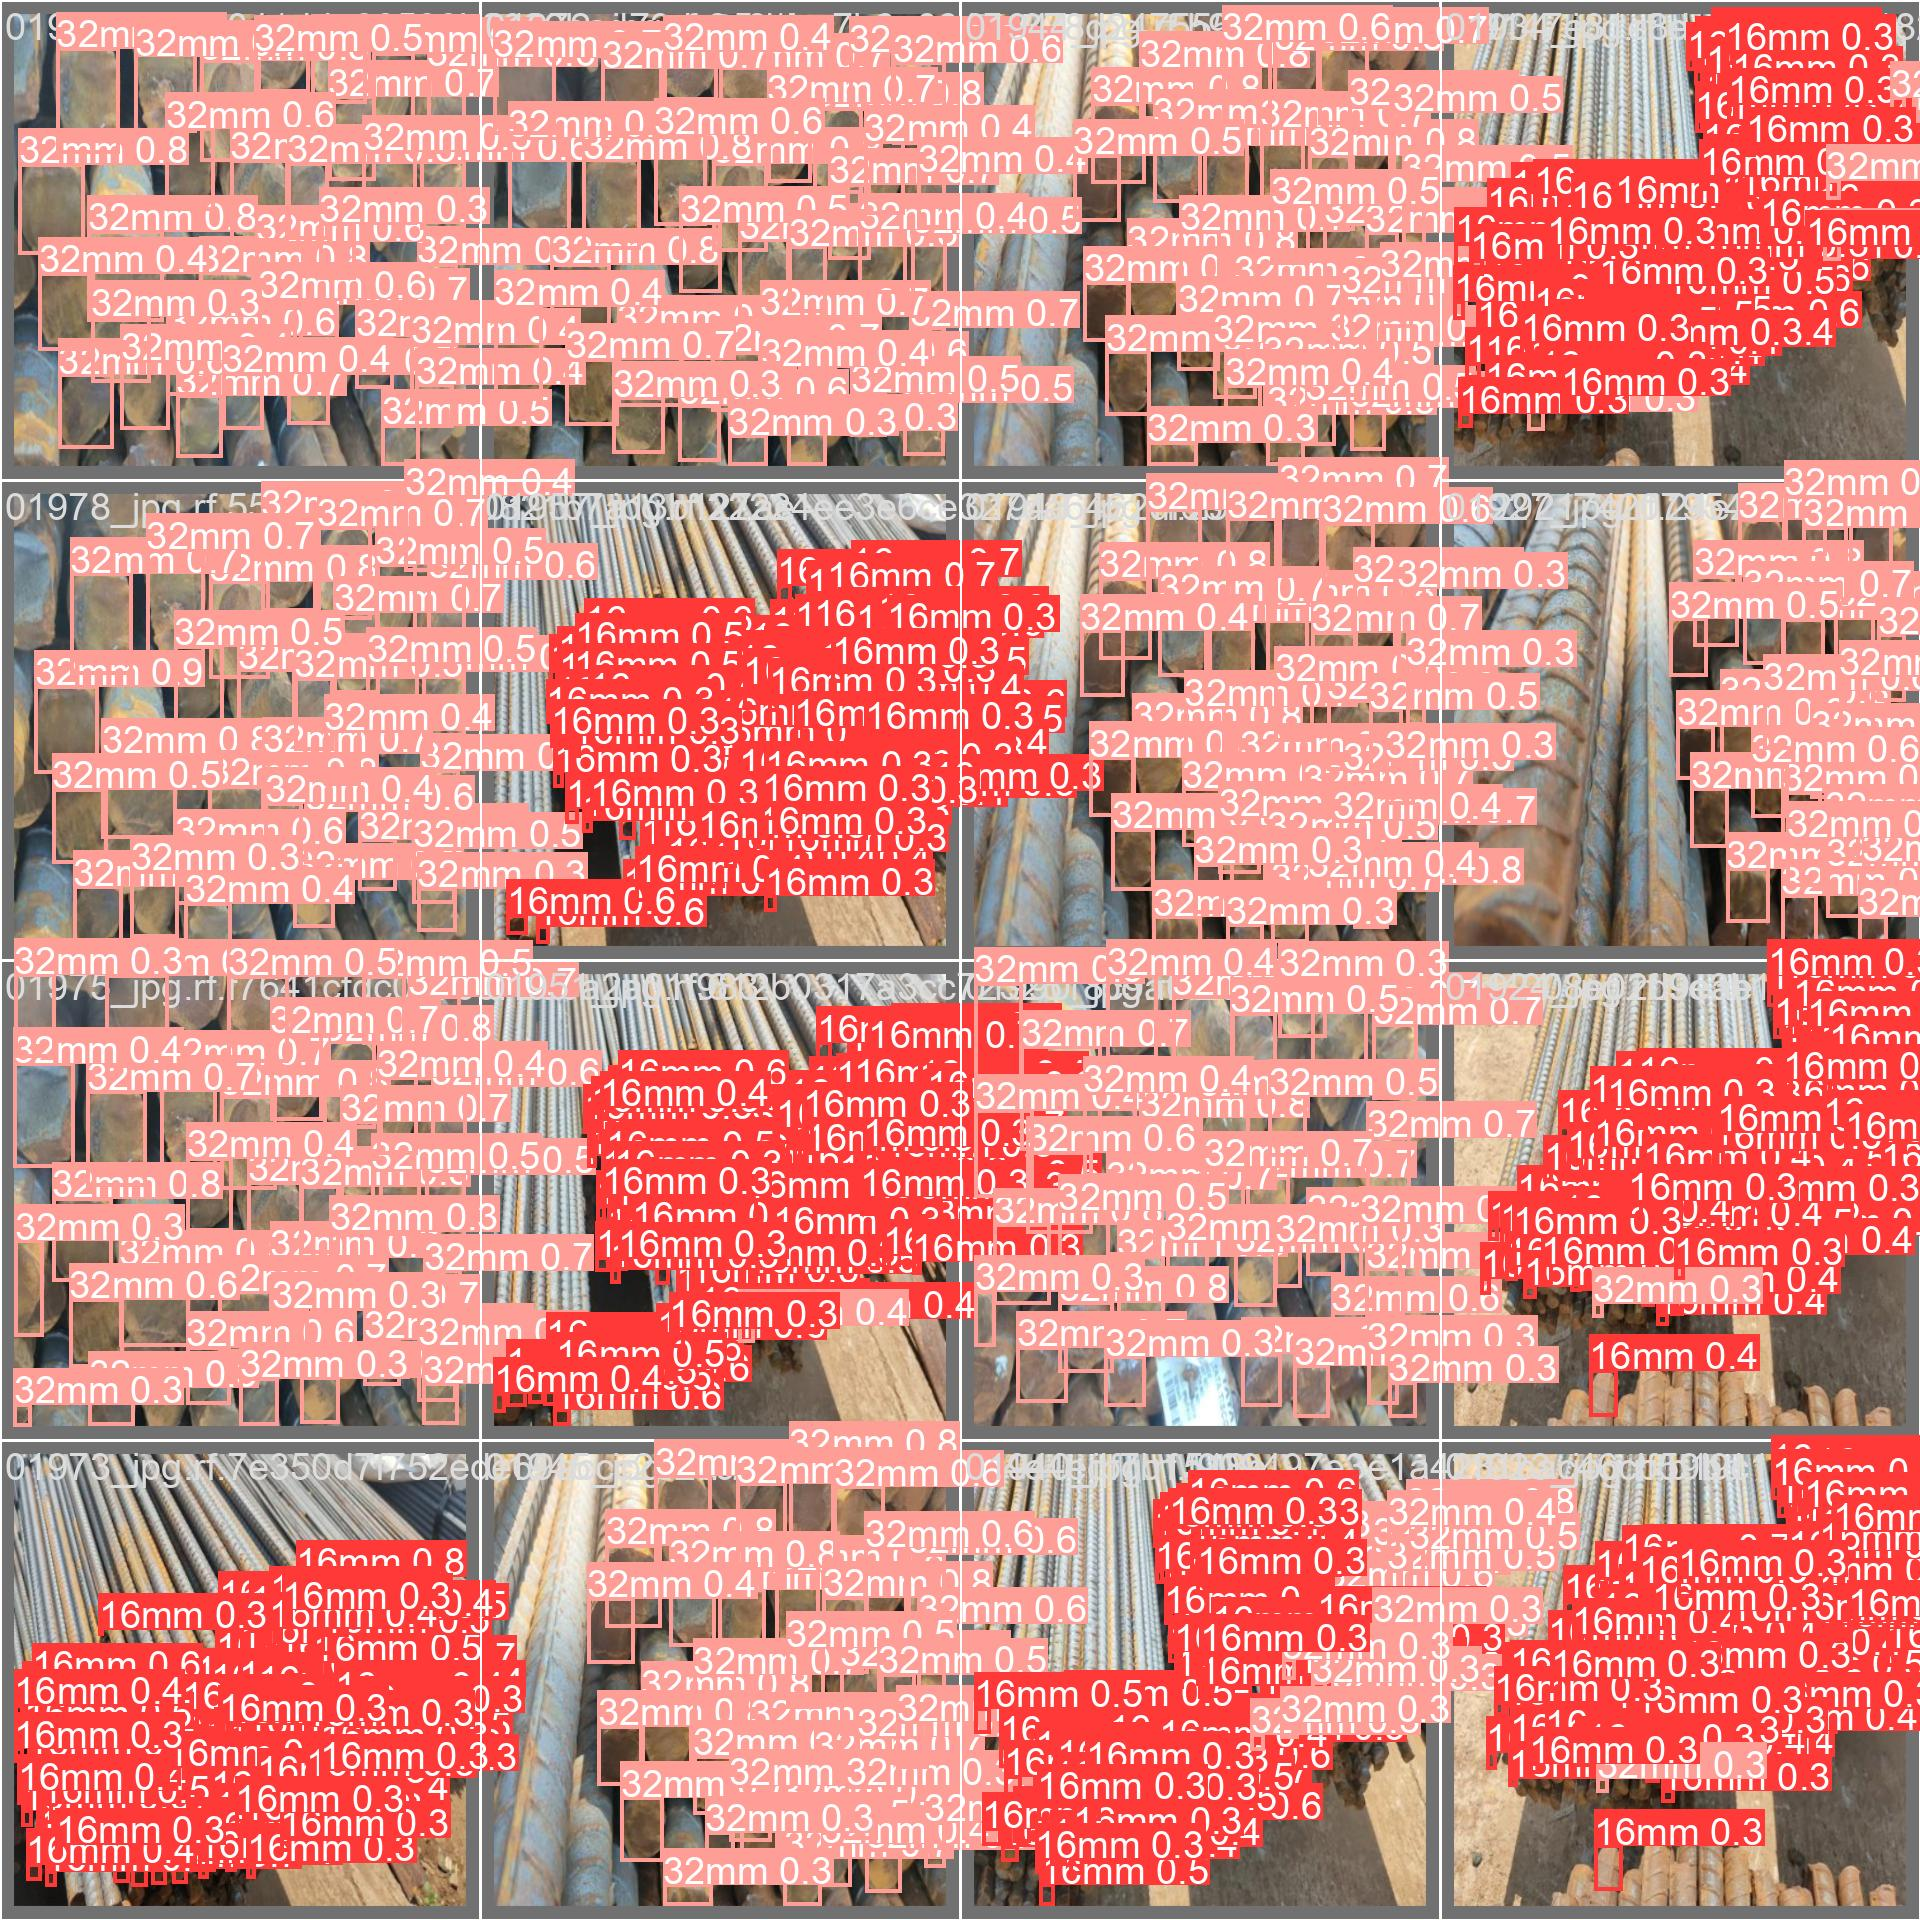

In [ ]:
# Checking the val_batch2_pred.jpg
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch2_pred.jpg', width=800)

In [ ]:
#validating the model using the test set
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.162 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients
val: Scanning /content/Steel-Rods-Annotation-33/valid/labels.cache... 488 images, 2 backgrounds, 0 corrupt: 100% 488/488 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/Steel-Rods-Annotation-33/valid/images/frame_00705_jpg.rf.56a6c01ebf2b3e0cbae202228a56993e.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 31/31 [00:53<00:00,  1.72s/it]
                   all        488      26300      0.493      0.633      0.546      0.287
                  16mm        488      14212      0.474      0.739       0.62      0.316
                  32mm        488       8117      0.532      0.775      0.661      0.368
                   8mm        488       3971      0.472      0.387      0.356      0.175
Speed: 1.0ms preprocess, 39.8ms inference, 0.0ms loss, 2.8ms postpro

In [ ]:
#Inference with custom model/ prediction
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.162 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients

image 1/251 /content/Steel-Rods-Annotation-33/test/images/00003_jpg.rf.b2faae16a450833577b4e82c0790a933.jpg: 512x512 136 16mms, 56.8ms
image 2/251 /content/Steel-Rods-Annotation-33/test/images/00023_jpg.rf.9886878de5652deda36248f5d24dd0ec.jpg: 512x512 133 16mms, 42.1ms
image 3/251 /content/Steel-Rods-Annotation-33/test/images/00040_jpg.rf.6b91ac9b7cec7c81de610a31c46b191d.jpg: 512x512 132 16mms, 42.1ms
image 4/251 /content/Steel-Rods-Annotation-33/test/images/00059_jpg.rf.36aa96f7f6a55df4cd78462dc4f59325.jpg: 512x512 133 16mms, 41.5ms
image 5/251 /content/Steel-Rods-Annotation-33/test/images/00074_jpg.rf.ef539419b25e8e1bbb206aa477280419.jpg: 512x512 146 16mms, 30.7ms
image 6/251 /content/Steel-Rods-Annotation-33/test/images/00113_jpg.rf.d581d9151fd45220c329d298cd3f3615.jpg: 512x512 103 16mms, 30.6ms
image 7/251 /content/Ste

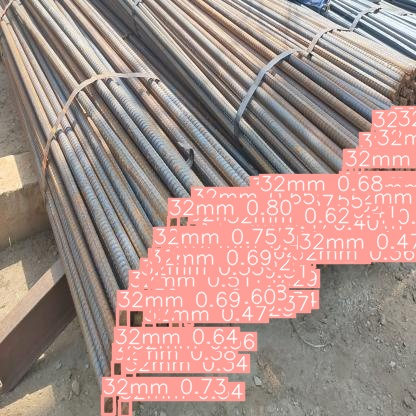

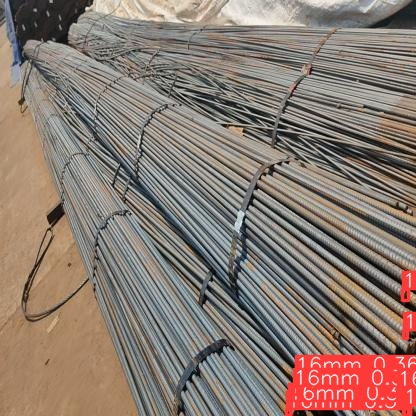

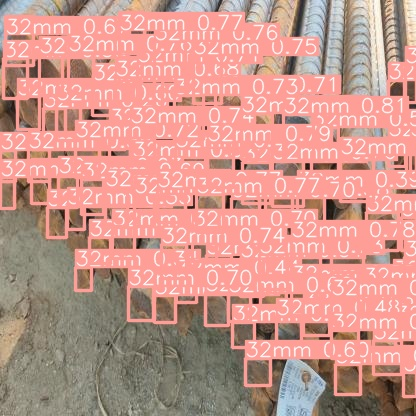

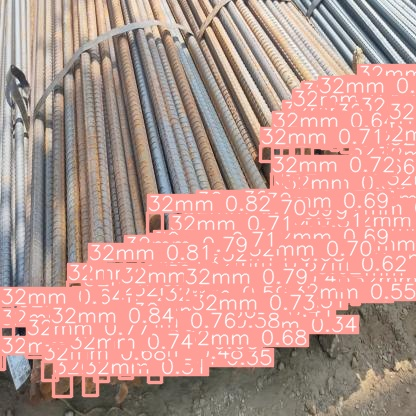

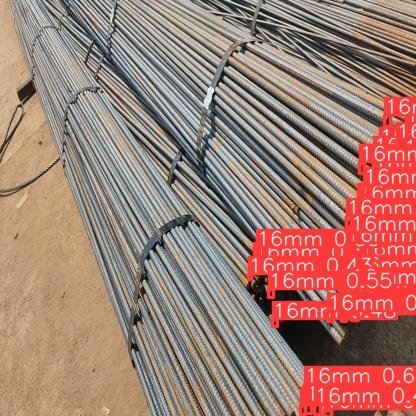

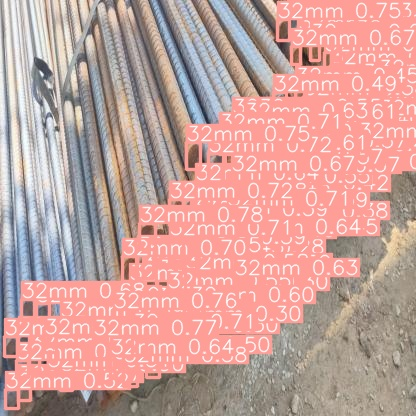

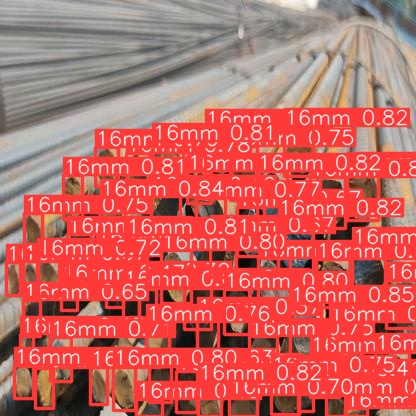

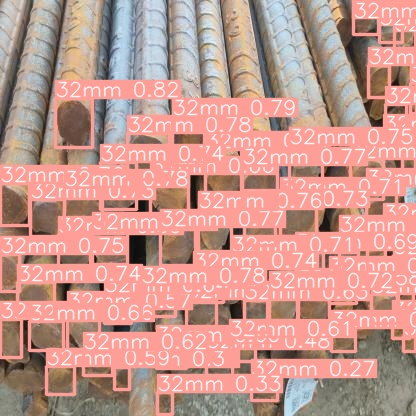

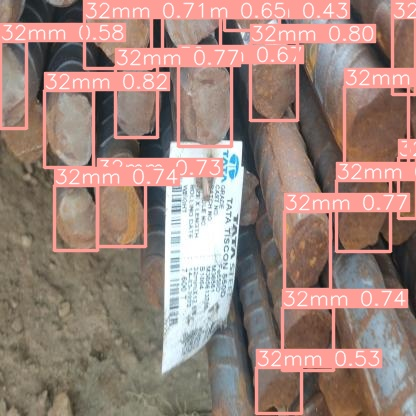

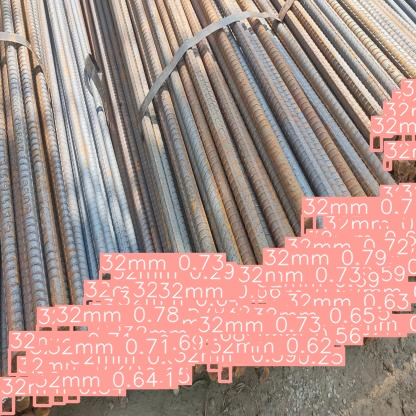

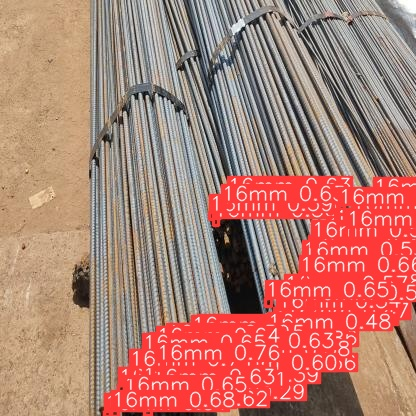

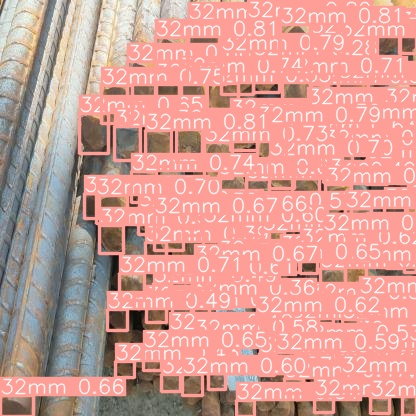

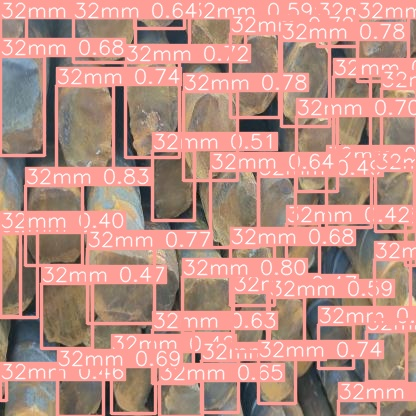

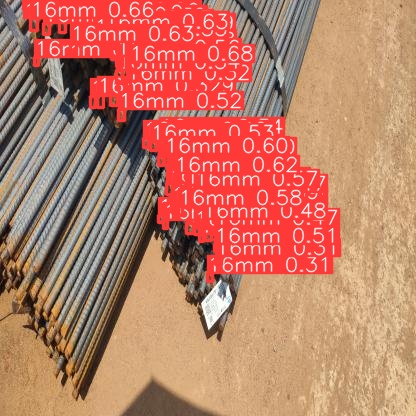

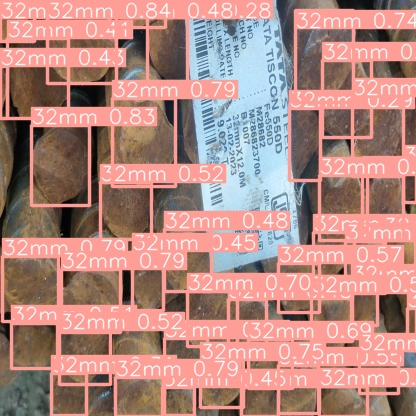

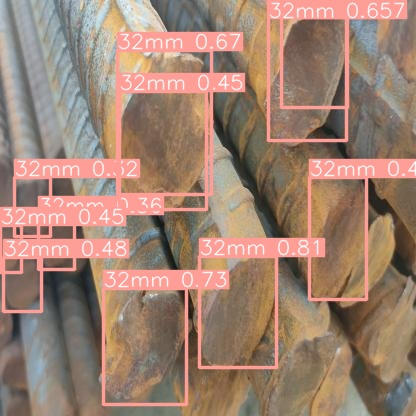

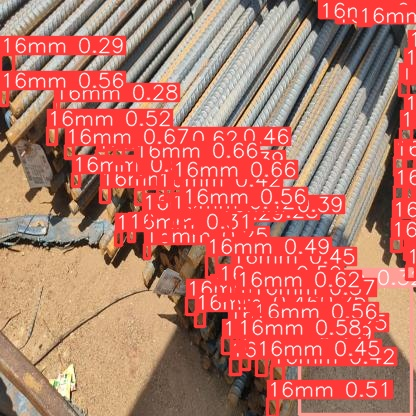

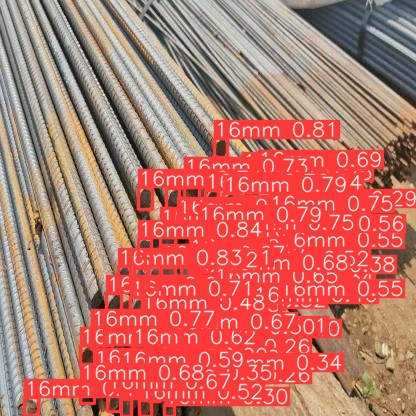

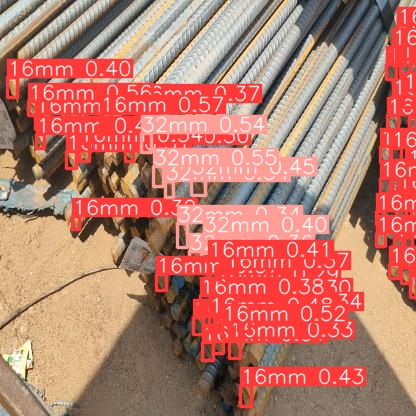

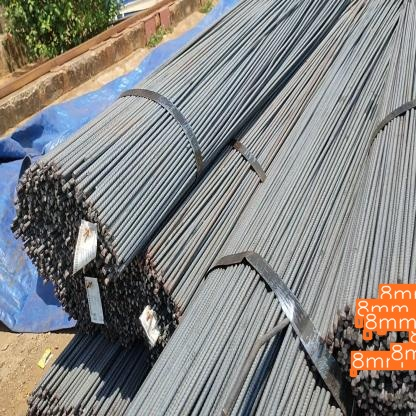

In [ ]:
# Getting the Predicted image

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[-20:]:
         display(Image(filename=image_path, width=600))
         print("\n")

In [ ]:
!zip -r /content/file.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/args.yaml (deflated 51%)
  adding: content/runs/detect/train/labels.jpg (deflated 32%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 28%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/train_batch0.jpg (deflated 1%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 1%)
  adding: content/runs/detect/train/train_batch2.jpg (deflated 0%)
  adding: content/runs/detect/train/events.out.tfevents.1692971284.832c7228a7ff.2778.0 (deflated 94%)
  adding: content/runs/detect/train2/ (stored 0%)
  adding: content/runs/detect/train2/F1_curve.png (deflated 13%)
  adding: content/runs/detect/train2/val_batch2_pred.jpg (deflated 4%)
  adding: content/runs/detect/train2/results.csv (deflated 81%)
  adding: content/runs/detect/train2/args.yaml (deflated 51%)
  a